<a href="https://colab.research.google.com/github/Y4S1-Deep-Learning/Leaf-Desease-Detection---Supervised-Learning/blob/aathif/DLAssignment_CNN_IT20644680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Mount the google drive on Google Collab Notebook and import the dataset

In [23]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After mounting our drive I will locate the folder where our data is stored to use it in our collab notebook

In [24]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive/DLProject".
!ls "/content/drive/My Drive/DLProject"

Dataset  Model


In [25]:
!ls "/content/drive/My Drive/DLProject/Dataset"

 00009_jpg.rf.5816fb858555c5d9d46aaf10df438590.jpg
 0000_jpg.rf.96d5edddddc46fa945cba2c6af603e09.jpg
 0008003-strawberry-leaf-veiner-large_jpg.rf.521e3d2b47ab7d941264a768236a57d6.jpg
 000gb_jpg.rf.09490707a2fcd570a7aeb4b010388541.jpg
 000g_jpg.rf.b6336228419884307afb143b4bbefce0.jpg
 003_JPG_jpg.rf.557d8eac801b1c45d60db35117975d43.jpg
 004-10_jpg.rf.3c61d6b637fa292b9585511ea635983a.jpg
 0042241_jpg.rf.8bb7a20bf4097872d824871418a7b883.jpg
 0052_jpg.rf.b51808064143ac45903172e8510b2595.jpg
 0061_jpg.rf.82b064a0f857d1ad34d67fc533dc65de.jpg
 007_JPG_jpg.rf.075ab2e841f4e67b7b6218ef417cecc2.jpg
 009-e1373768789869_jpg.rf.5bcf99cf612b8aa6c63c8020589bbca1.jpg
 00c_jpg.rf.e1ce54547a8a779f6942311df63ace2a.jpg
 00gb_jpg.rf.efd384eb10cdee1e91cb65e763a24900.jpg
 011_jpg.rf.30b86f15702d58d812d238265bf5efc0.jpg
'01Apple-scab-2-Venturia-inaequalis_ashx?w=600&h=408&bc=ffffff_jpg.rf.11a071e8d624eb3d16422b2b43c50098.jpg'
 01c_jpg.rf.f889ad33950bffbb198fcb3b186ee23b.jpg
 01gb_jpg.rf.4ccb68b10220c5dfd0529fd

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical





In [27]:
print(tf.__version__)

2.13.0


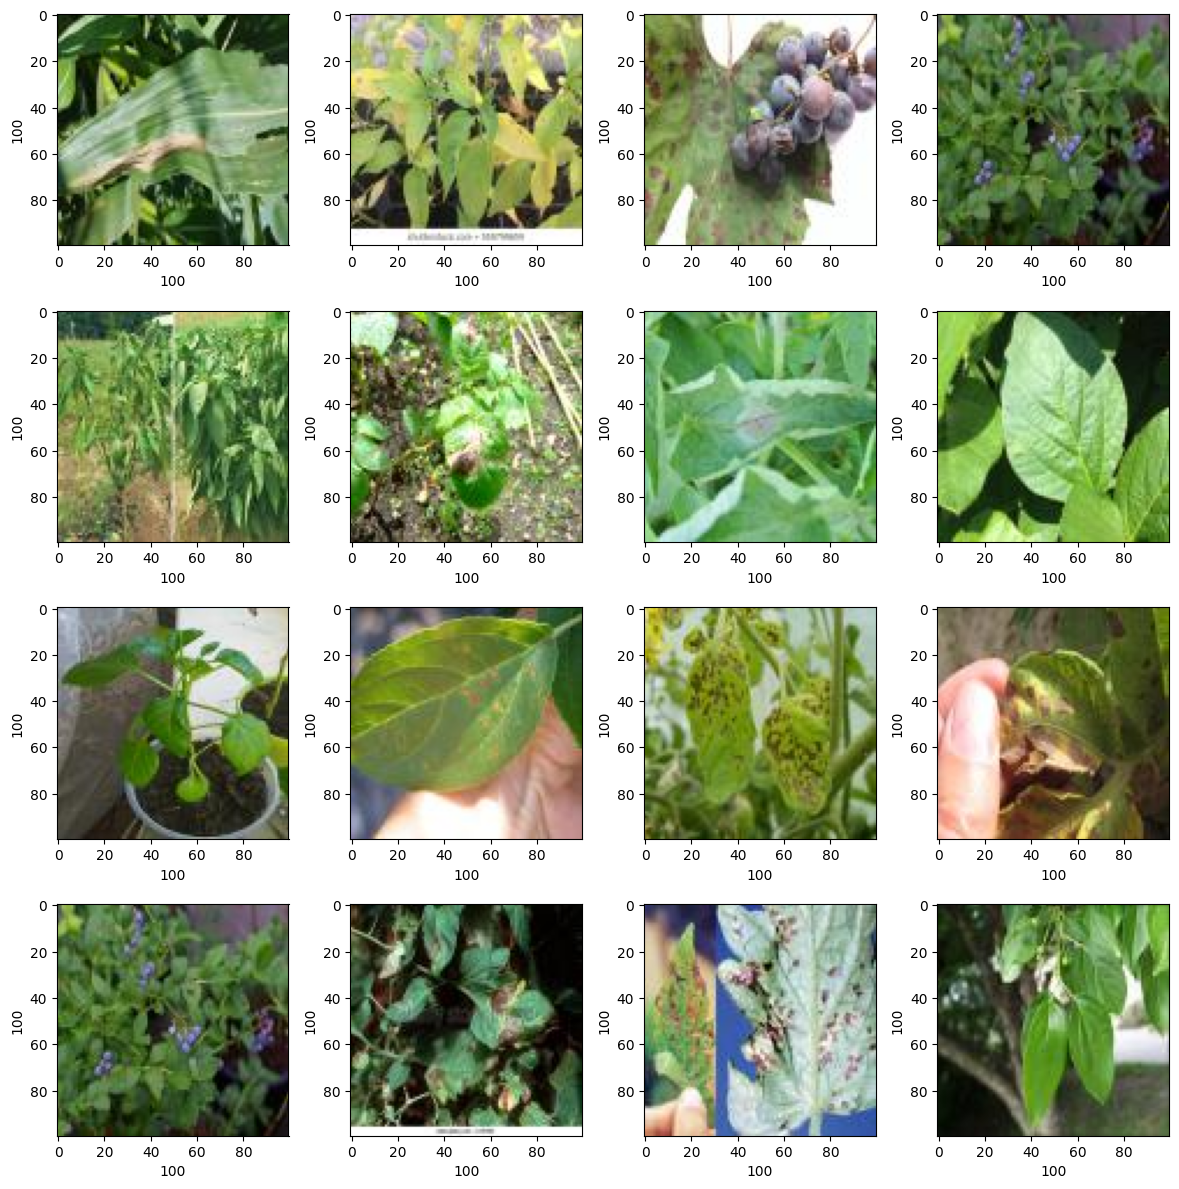

In [28]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/DLProject/Dataset"
for i in range (1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)



In [30]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image = cv2.resize(image,(256,256))
      return img_to_array(image)
    else :
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [31]:
dir = "/content/drive/My Drive/DLProject"
image_list, label_list = [],[]
all_labels = ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf',
        'Bell_pepper leaf spot', 'Bell_pepper leaf',
        'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot',
        'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight',
        'Potato leaf late blight', 'Potato leaf', 'Raspberry leaf', 'Soyabean leaf',
        'Soybean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf',
        'Tomato Early blight leaf', 'Tomato Septoria leaf spot',
        'Tomato leaf bacterial spot', 'Tomato leaf late blight',
        'Tomato leaf mosaic virus', 'Tomato leaf yellow virus',
        'Tomato leaf', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf',
        'grape leaf black rot', 'grape leaf']
binary_labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,21,22,23,24,25,26,27,28,29]
temp = -1

for directory in ['Dataset']:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp +=1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [32]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    2360
dtype: int64

In [33]:
image_list[0].shape

(256, 256, 3)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,test_size = 0.2 ,random_state = 10)

In [13]:
x_train = np.array(x_train, dtype = np.float16) / 255.0
x_test = np.array(x_test, dtype = np.float16) / 255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = "same", input_shape =(256,256,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding = "same",activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [16]:
model.compile(loss = 'binary_crossentropy',optimizer = Adam(0.0001),metrics = ['accuracy'])

In [17]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.2 , random_state= 10)

In [18]:
epochs = 25
batch_size = 128
history = model.fit(x_train,y_train,batch_size = batch_size , epochs= epochs , validation_data = (x_val,y_val))

Epoch 1/25
12/12 [==============================] - 99s 8s/step - loss: 0.2903 - accuracy: 0.9139 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 2/25
12/12 [==============================] - 88s 7s/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 3/25
12/12 [==============================] - 91s 8s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/25
12/12 [==============================] - 88s 7s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/25
12/12 [==============================] - 88s 7s/step - loss: 7.6109e-04 - accuracy: 1.0000 - val_loss: 7.0442e-04 - val_accuracy: 1.0000
Epoch 6/25
12/12 [==============================] - 90s 8s/step - loss: 4.8030e-04 - accuracy: 1.0000 - val_loss: 4.3933e-04 - val_accuracy: 1.0000
Epoch 7/25
12/12 [==============================] - 89s 8s/step - loss: 2.7313e-04 - accuracy: 1.0000 - val_loss: 2.6143e-04 - val_accuracy: 1.0

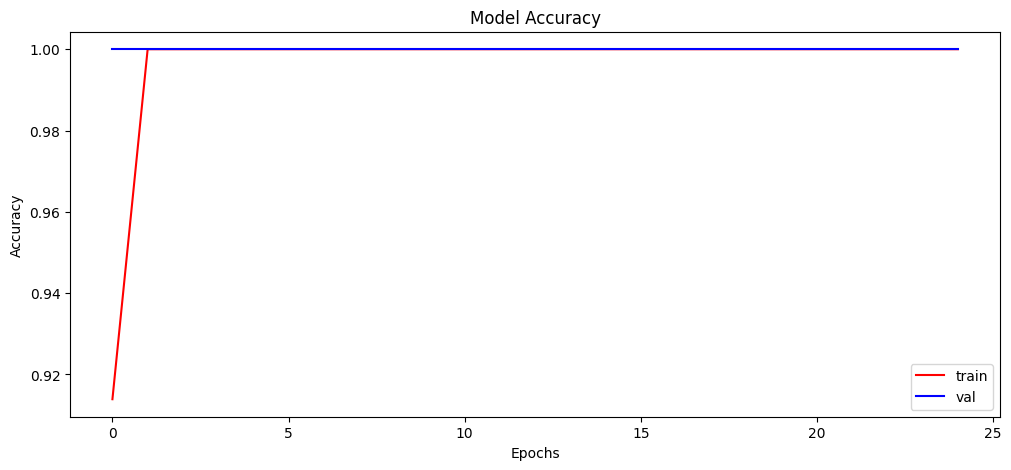

In [19]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [21]:
print("Calculating model accuracy")
scores = model.evaluate(x_test,y_test)
print(f"Test Accuracy : {scores[1]*100}")

Calculating model accuracy
15/15 [==============================] - 7s 452ms/step - loss: 5.3402e-06 - accuracy: 1.0000
Test Accuracy : 100.0


In [34]:
y_pred = model.predict(x_test)

15/15 [==============================] - 16s 1s/step


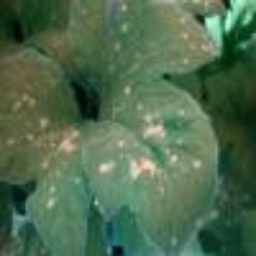

In [35]:
img = array_to_img(x_test[11])
img

In [37]:
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[11])])
print(y_pred[2])

Original Label:  Apple Scab Leaf
Predicted Label:  Apple Scab Leaf
[1.]


In [39]:
for i in range(50):
  print (all_labels[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])

Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Leaf - Apple Scab Leaf
Apple Scab Lea

In [40]:
model.save("/content/drive/My Drive/DLProject/Model")